# Housing Price Prediction In Bangalore

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

pd.options.display.max_columns = None
pd.set_option('display.max_rows', 500)
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (10,5)

In [2]:
housing_test_data = pd.read_csv('Test.csv')
housing= pd.read_csv("Train.csv")

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
housing.shape

(13320, 9)

In [5]:
housing.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
housing.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
for column in housing.columns:
    print(housing[column].value_counts())
    print("*"*30)

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
******************************
Ready To Move           10581
18-Dec                    307
18-May                    295
18-Apr                    271
18-Aug                    200
19-Dec                    185
18-Jul                    143
18-Mar                    131
18-Jun                     99
20-Dec                     98
21-Dec                     93
19-Mar                     88
18-Feb                     62
18-Nov                     47
18-Jan                     43
18-Sep                     41
19-Jun                     40
19-Jan                     39
18-Oct                     39
19-Jul                     36
17-Dec                     29
20-Jan                     24
17-Oct                     21
19-Sep                     21
22-Jun                     19
19-Aug                     18
21-Jun                     17
19-Apr       

In [8]:
housing.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [10]:
housing.drop(columns=['area_type', 'availability', 'society'], inplace=True)

In [11]:
housing.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [12]:
housing.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [13]:
housing['location'].value_counts()

Whitefield                                      540
Sarjapur  Road                                  399
Electronic City                                 302
Kanakpura Road                                  273
Thanisandra                                     234
                                               ... 
Sir M V Nagar                                     1
Govindraja Nagar                                  1
2 Bedroom Furnished Farm House in Kolar Road      1
Maruthi Layout                                    1
Kalasipalya                                       1
Name: location, Length: 1305, dtype: int64

In [14]:
housing['location'] = housing['location'].fillna('Sarjapur  Road')

In [15]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   balcony     12711 non-null  float64
 5   price       13320 non-null  float64
dtypes: float64(3), object(3)
memory usage: 624.5+ KB


In [16]:
housing['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
18 Bedroom       1
16 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
14 BHK           1
19 BHK           1
43 Bedroom       1
Name: size, dtype: int64

In [17]:
housing['size'] = housing['size'].fillna('2 BHK')

In [18]:
housing['bath'] = housing['bath'].fillna(housing['bath'].median())

In [19]:
housing['bhk'] = housing['size'].str.split().str.get(0).astype(int)

In [20]:
housing.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [21]:
def convertRange(x):
    temp = x.split("-")
    if len(temp) == 2:
        return (float(temp[0]) + float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [22]:
housing['total_sqft'] = housing['total_sqft'].apply(convertRange)

In [23]:
housing.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [24]:
housing['price_per_sqft'] = housing['price'] * 100000 / housing['total_sqft']

In [25]:
housing['price_per_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13320, dtype: float64

In [26]:
housing['location'].value_counts()

Whitefield                                      540
Sarjapur  Road                                  400
Electronic City                                 302
Kanakpura Road                                  273
Thanisandra                                     234
                                               ... 
Sir M V Nagar                                     1
Govindraja Nagar                                  1
2 Bedroom Furnished Farm House in Kolar Road      1
Maruthi Layout                                    1
Kalasipalya                                       1
Name: location, Length: 1305, dtype: int64

In [27]:
housing['location'] = housing['location'].apply(lambda x : x.strip())
location_count = housing['location'].value_counts()

In [28]:
location_count

Whitefield                            541
Sarjapur  Road                        400
Electronic City                       304
Kanakpura Road                        273
Thanisandra                           237
                                     ... 
akshaya nagar t c palya                 1
near Ramanashree California resort      1
5th block Koramangala                   1
Narasapura                              1
Kalasipalya                             1
Name: location, Length: 1294, dtype: int64

In [29]:
location_count_less_10 = location_count[location_count <= 10]
location_count_less_10

Basapura                              10
BTM 1st Stage                         10
Ganga Nagar                           10
Kalkere                               10
Gunjur Palya                          10
                                      ..
akshaya nagar t c palya                1
near Ramanashree California resort     1
5th block Koramangala                  1
Narasapura                             1
Kalasipalya                            1
Name: location, Length: 1053, dtype: int64

In [30]:
housing['location'] = housing['location'].apply(lambda x: 'other' if x in location_count_less_10 else x)

In [31]:
housing.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,13274.000000,13320.000000,12711.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,1.584376,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,0.817263,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,0.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,1.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,2.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3.000000,3600.000000,43.000000,1.200000e+07


Removing Outliers

In [32]:
(housing['total_sqft'] / housing['bhk']).describe()

count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [33]:
housing = housing[((housing['total_sqft'] / housing['bhk']) >= 300)]
housing.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,12530.000000,12530.000000,12014.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,1.587648,111.382401,2.650838,6303.979357
std,1261.271296,1.077938,0.808842,152.077329,0.976678,4162.237981
min,300.000000,1.000000,0.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,1.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,2.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3.000000,3600.000000,16.000000,176470.588235


In [34]:
housing.shape

(12530, 8)

In [35]:
housing.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [36]:
housing['balcony'].value_counts()

2.0    4884
1.0    4656
3.0    1550
0.0     924
Name: balcony, dtype: int64

In [37]:
housing['balcony'] = housing['balcony'].fillna(1)

In [38]:
housing['balcony'].isnull().sum()

0

In [39]:
housing['price_per_sqft'].describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [40]:
def remove_outliers_sqft(df):
    df_output = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        
        gen_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
        df_output = pd.concat([df_output, gen_df], ignore_index=True)
    return df_output
housing = remove_outliers_sqft(housing)

In [41]:
housing.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000
mean,1508.440608,2.471702,1.571789,91.286372,2.574896,5659.062876
std,880.694214,0.979449,0.790242,86.342786,0.897649,2265.774749
min,300.000000,1.000000,0.000000,10.000000,1.000000,1250.000000
25%,1110.000000,2.000000,1.000000,49.000000,2.000000,4244.897959
50%,1286.000000,2.000000,2.000000,67.000000,2.000000,5175.600739
75%,1650.000000,3.000000,2.000000,100.000000,3.000000,6428.571429
max,30400.000000,16.000000,3.000000,2200.000000,16.000000,24509.803922


Text(0, 0.5, 'Count')

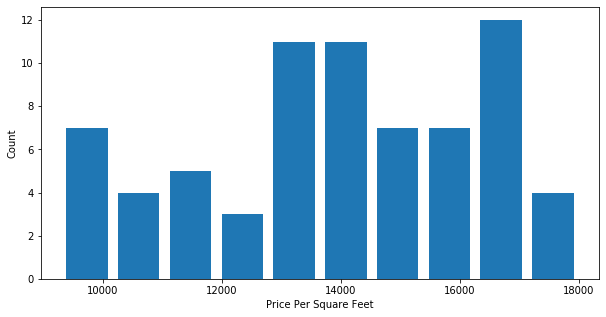

In [42]:
plt.hist(housing[housing.location == "Rajaji Nagar"].price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")


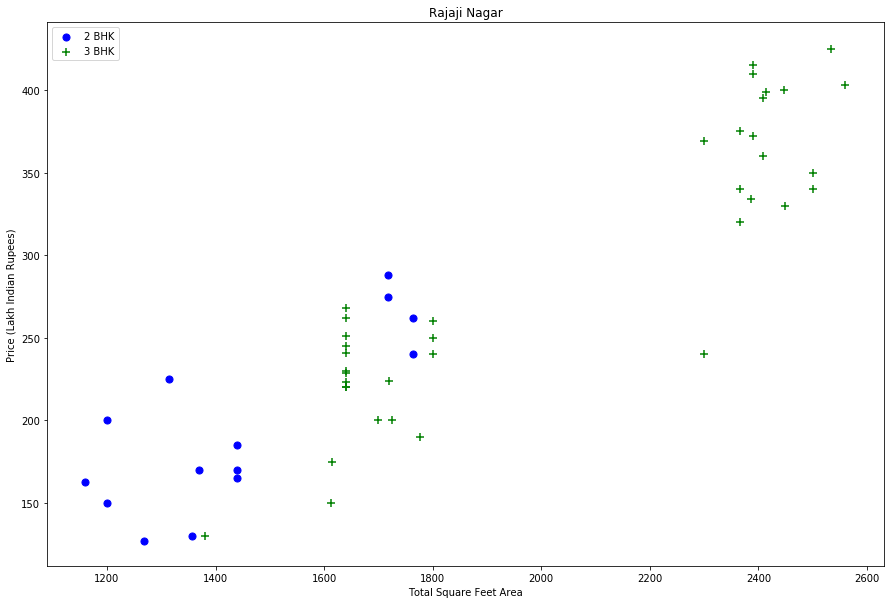

In [43]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
plot_scatter_chart(housing,"Rajaji Nagar")

In [44]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

housing = remove_bhk_outliers(housing)
housing.shape

(7360, 8)

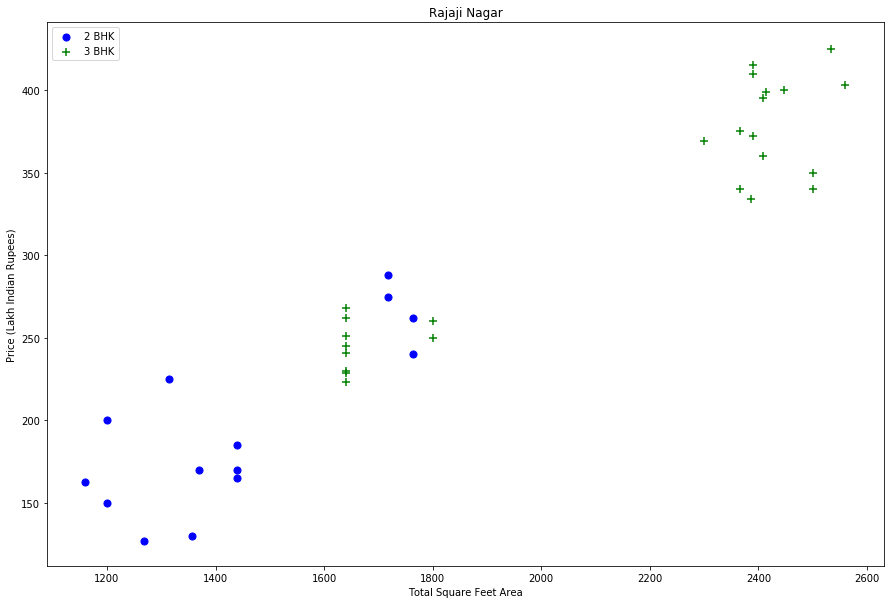

In [45]:
plot_scatter_chart(housing,"Rajaji Nagar")

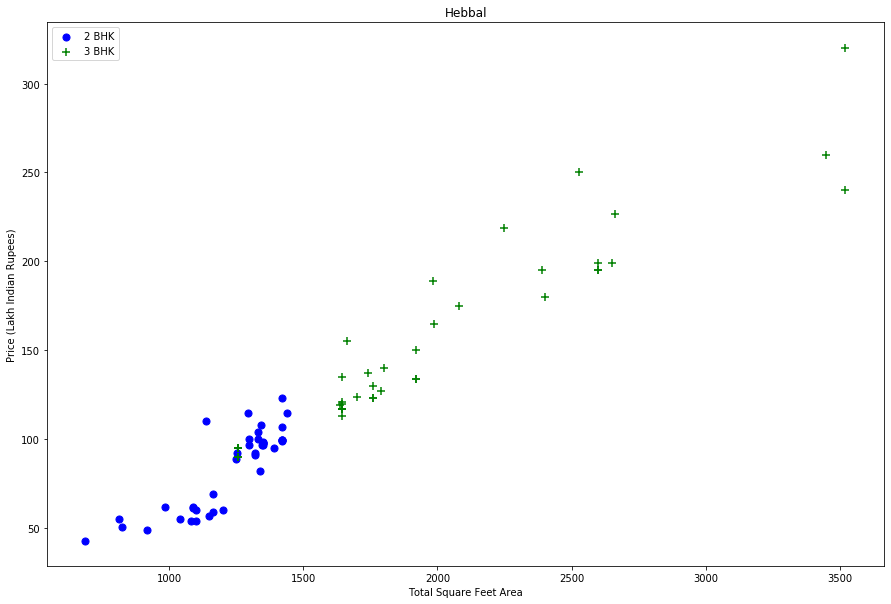

In [46]:
plot_scatter_chart(housing,"Hebbal")

Text(0, 0.5, 'Count')

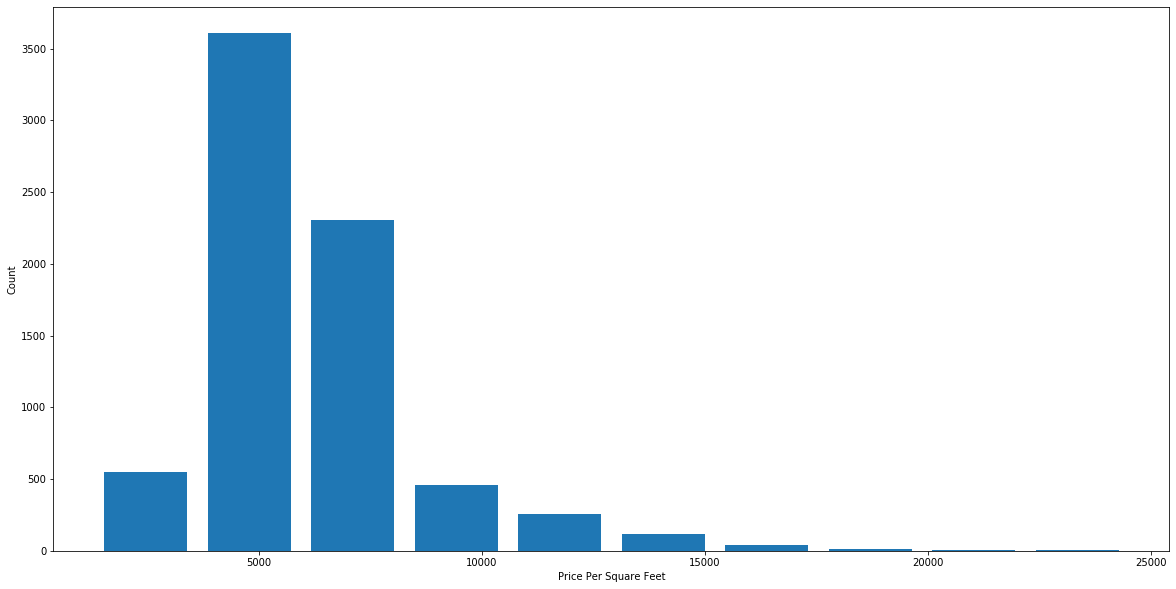

In [47]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(housing.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [48]:
housing.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [49]:
housing[housing.bath > housing.bhk + 2]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
1637,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520
5274,Nagasandra,4 Bedroom,7000.0,8.0,1.0,450.0,4,6428.571429
6760,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330
8468,other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689


In [50]:

# Remove the outliers with more than (no of BHK + 2) bathrooms
housing = housing[housing.bath < (housing.bhk + 2)]
housing.shape

(7281, 8)

In [51]:

housing = housing.drop(['size', 'price_per_sqft', 'balcony'], axis='columns')
housing.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


## One Hot Encoding

In [52]:
housing.to_csv('clean_data.csv')

In [53]:

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler

In [54]:
x = housing.drop(columns=['price'])
y = housing['price']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [56]:
print(X_train.shape)
print(X_test.shape)

(5824, 4)
(1457, 4)


In [57]:
column_trans = make_column_transformer((OneHotEncoder(sparse=False), ['location']), remainder='passthrough')

In [58]:

scalar = StandardScaler()

In [59]:
lr = LinearRegression(normalize=True)

In [60]:
pipe = make_pipeline(column_trans, scalar, lr)

In [61]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=False),
                                                  ['location'])],
                                   verbose=False)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregressio

In [62]:
y_pred_lr = pipe.predict(X_test)

In [63]:
r2_score(y_test, y_pred_lr)

0.8492532583430927

# Applying Ridge

In [64]:
ridge = Ridge()

In [65]:
pipe = make_pipeline(column_trans, scalar, lr)

In [66]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=False),
                                                  ['location'])],
                                   verbose=False)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregressio

In [67]:
y_pred_ridge = pipe.predict(X_test)

In [68]:
r2_score( y_pred_ridge, y_test)

0.8193395890726733

# Applying Lasso

In [69]:
lasso = Lasso()

In [70]:
pipe = make_pipeline(column_trans, scalar, lr)

In [71]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=False),
                                                  ['location'])],
                                   verbose=False)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregressio

In [72]:
y_pred_lasso = pipe.predict(X_test)

In [73]:
r2_score(y_pred_lasso, y_test)

0.8193395890726733

In [74]:
import pickle

In [75]:
pickle.dump(pipe, open('RidgeModel.pkl', 'wb'))

In [77]:
housing_test_data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0,NaN
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,NaN,2400,9.0,2.0,NaN
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,Saandtt,1650,5.0,2.0,NaN
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,Winerri,1322,3.0,1.0,NaN
4,Super built-up Area,Ready To Move,Konanakunte,2 BHK,AmageSa,1161,2.0,1.0,NaN
